# Verify AlphaFold accuracy for 100 targets
Subset: target_subset_how_eq_random_num_100_seed_0

Set the target numbers of `is_similar_AF2` and not `is_similar_AF2` equal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (5, 3)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
label_df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,Seed,Recycle,Ensemble,Target,Num_diff,Num_missing,Length
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.980,0.919,0.910,0.901,0.955,0.900,0.032,model_1_ptm,0,10,1,6AN4_A,0,7,158
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.979,0.916,0.910,0.901,0.956,0.901,0.019,model_1_ptm,0,10,8,6AN4_A,0,7,158
2,model_1_ptm_seed_0_rec_1_ens_1,0.981,0.980,0.917,0.909,0.901,0.944,0.895,20.749,model_1_ptm,0,1,1,6AN4_A,0,7,158
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.979,0.917,0.910,0.901,0.947,0.896,20.749,model_1_ptm,0,1,8,6AN4_A,0,7,158
4,model_1_ptm_seed_0_rec_2_ens_1,0.981,0.979,0.919,0.911,0.903,0.948,0.897,0.172,model_1_ptm,0,2,1,6AN4_A,0,7,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112595,model_5_seed_1_rec_7_ens_8,0.977,0.965,0.865,0.888,0.885,0.920,NaN,0.045,model_5,1,7,8,6SU3_X,0,8,264
112596,model_5_seed_1_rec_8_ens_1,0.980,0.964,0.861,0.894,0.890,0.922,NaN,0.032,model_5,1,8,1,6SU3_X,0,8,264
112597,model_5_seed_1_rec_8_ens_8,0.977,0.965,0.866,0.887,0.884,0.920,NaN,0.089,model_5,1,8,8,6SU3_X,0,8,264
112598,model_5_seed_1_rec_9_ens_1,0.980,0.964,0.861,0.894,0.890,0.922,NaN,0.031,model_5,1,9,1,6SU3_X,0,8,264


In [4]:
target_df = pd.read_csv(target_list, index_col=0)
target_df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,5ZHE_A,2.180,2021-03-03T00:00:00Z,">5zhe_A mol:protein length:253 Ditrans,polyci...",MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...,253,52,2,True
2,5ZCT_A,2.050,2019-03-27T00:00:00Z,>5zct_A mol:protein length:306 Ribosomal prot...,MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...,306,11,9,True
3,6IYB_A,2.096,2020-08-05T00:00:00Z,>6iyb_A mol:protein length:199 Ras-related pr...,GSAMGSTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATI...,199,20,2,True
4,6PXX_B,1.500,2019-12-11T00:00:00Z,>6pxx_B mol:protein length:265 Beta-lactamase,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,265,447,130,True
...,...,...,...,...,...,...,...,...,...
295,6MGH_A,1.950,2019-05-01T00:00:00Z,>6mgh_A mol:protein length:163 miRFP670nano,MGSHHHHHHGRSAAGTMANLDKMLNTTVTEVRQFLQVDRVCVFQFE...,163,8,8,False
296,6K2F_A,1.550,2019-06-05T00:00:00Z,>6k2f_A mol:protein length:138 Actin binding ...,AIELSTDLINKFKDMNSSGNGRFIQATIVDETINIKAIEQGTSDFD...,138,2,2,False
297,6WJA_A,2.098,2021-03-03T00:00:00Z,>6wja_A mol:protein length:310 NAD-dependent ...,MSAERILVTGGAGFIGSHLVDALLAKGYAVRVLDDLSTGKVGNLPM...,310,6,6,False
298,7CUZ_A,2.420,2021-04-28T00:00:00Z,>7cuz_A mol:protein length:312 Acetylxylan es...,MTKINNWQDYQGSSLKPEDFDKFWDEKINLVSNHQFEFELIEKNLS...,312,4,4,False


In [5]:
target_df['is_similar_AF2'].value_counts()

False    150
True     150
Name: is_similar_AF2, dtype: int64

In [6]:
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.980,0.919,0.910,0.901,0.955,0.900,0.032,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.979,0.916,0.910,0.901,0.956,0.901,0.019,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.981,0.980,0.917,0.909,0.901,0.944,0.895,20.749,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.979,0.917,0.910,0.901,0.947,0.896,20.749,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.981,0.979,0.919,0.911,0.903,0.948,0.897,0.172,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112595,model_5_seed_1_rec_7_ens_8,0.977,0.965,0.865,0.888,0.885,0.920,NaN,0.045,model_5,...,264,6SU3_X,1.500,2020-01-08T00:00:00Z,>6su3_X mol:protein length:264 48C12 heliorho...,MAKPTVKEIKSLQNFNRIAGVFHLLQMLAVLALANDFALPMTGTYL...,264,8,8,False
112596,model_5_seed_1_rec_8_ens_1,0.980,0.964,0.861,0.894,0.890,0.922,NaN,0.032,model_5,...,264,6SU3_X,1.500,2020-01-08T00:00:00Z,>6su3_X mol:protein length:264 48C12 heliorho...,MAKPTVKEIKSLQNFNRIAGVFHLLQMLAVLALANDFALPMTGTYL...,264,8,8,False
112597,model_5_seed_1_rec_8_ens_8,0.977,0.965,0.866,0.887,0.884,0.920,NaN,0.089,model_5,...,264,6SU3_X,1.500,2020-01-08T00:00:00Z,>6su3_X mol:protein length:264 48C12 heliorho...,MAKPTVKEIKSLQNFNRIAGVFHLLQMLAVLALANDFALPMTGTYL...,264,8,8,False
112598,model_5_seed_1_rec_9_ens_1,0.980,0.964,0.861,0.894,0.890,0.922,NaN,0.031,model_5,...,264,6SU3_X,1.500,2020-01-08T00:00:00Z,>6su3_X mol:protein length:264 48C12 heliorho...,MAKPTVKEIKSLQNFNRIAGVFHLLQMLAVLALANDFALPMTGTYL...,264,8,8,False


In [7]:
# Check target number
targets = df['Target'].unique().tolist()
print(len(targets))

300


In [8]:
# Check target number that does not have LDDT score
df.groupby('Target').head(1)['Global_LDDT'].isnull().sum()

27

## Model Quality

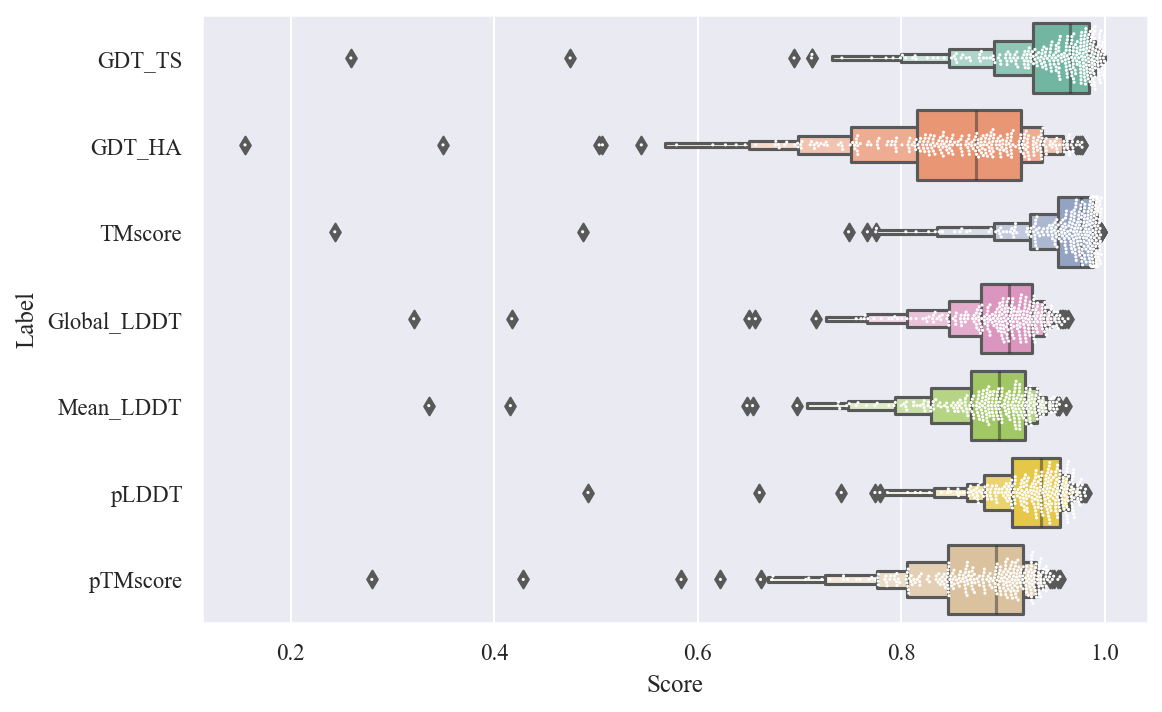

In [9]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels.png')


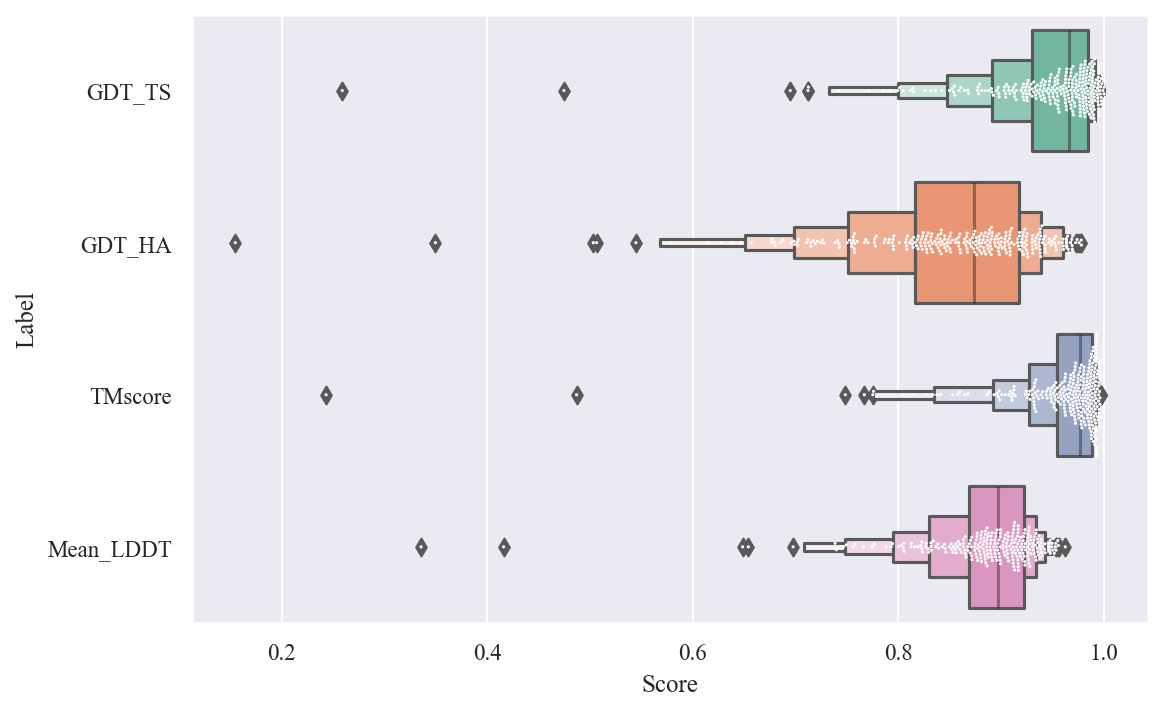

In [10]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels.png')

### Verify whether the quality of the predicted structure changes between targets that have similar sequences in the AlphaFold training data and targets that do not

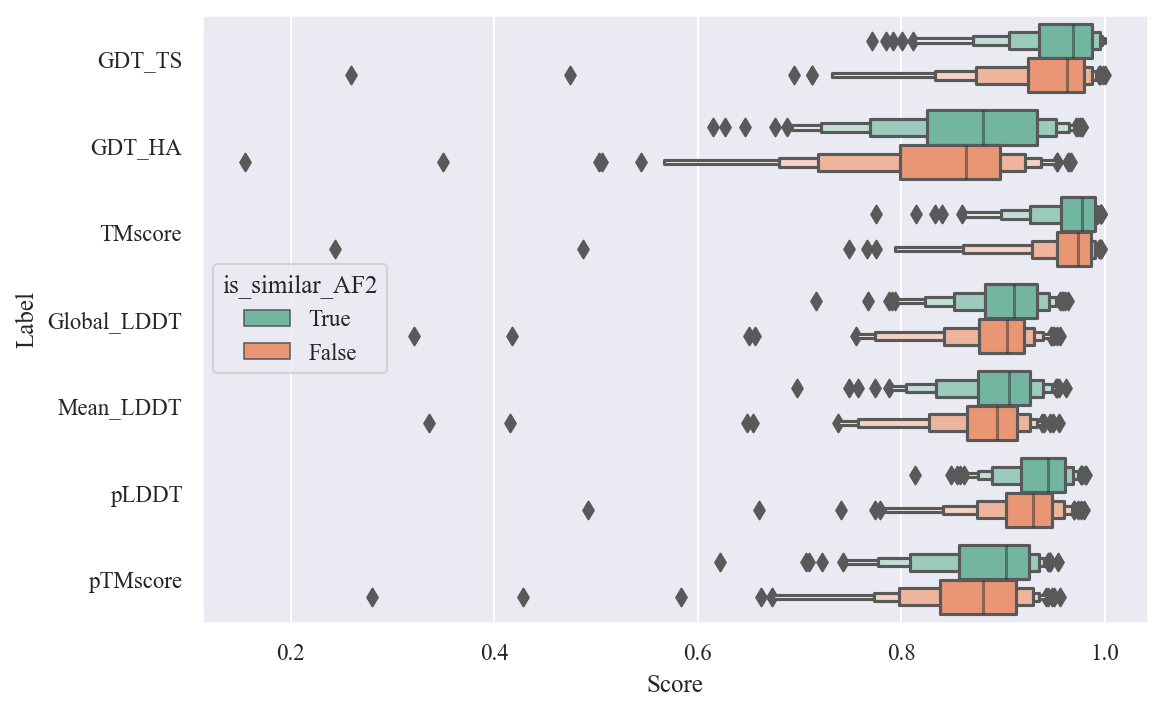

In [11]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

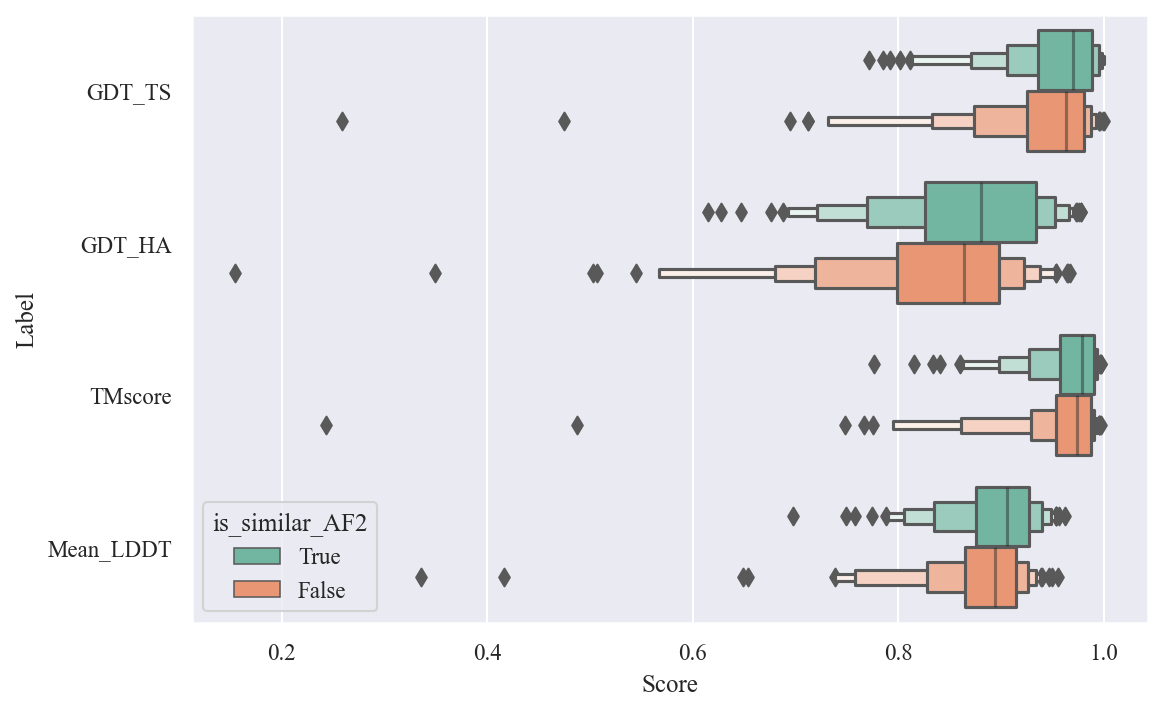

In [12]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

In [13]:
# Statistical test
similar_df = label_max_df[label_max_df['is_similar_AF2'] == True]
not_similar_df = label_max_df[label_max_df['is_similar_AF2'] == False]
for label in labels:
    print(label)
    x = similar_df.query('Label == @label')['Score']
    y = not_similar_df.query('Label == @label')['Score']
    print(f'{x.mean():.3f}, {y.mean():.3f}')
    result = stats.mannwhitneyu(x, y)
    print(result)

GDT_TS
0.953, 0.935
MannwhitneyuResult(statistic=9572.0, pvalue=0.012775297221927212)
GDT_HA
0.868, 0.832
MannwhitneyuResult(statistic=8920.0, pvalue=0.0009648502115386839)
TMscore
0.965, 0.953
MannwhitneyuResult(statistic=9953.5, pvalue=0.042250861627853874)
Mean_LDDT
0.893, 0.874
MannwhitneyuResult(statistic=10408.0, pvalue=0.1313281908779701)


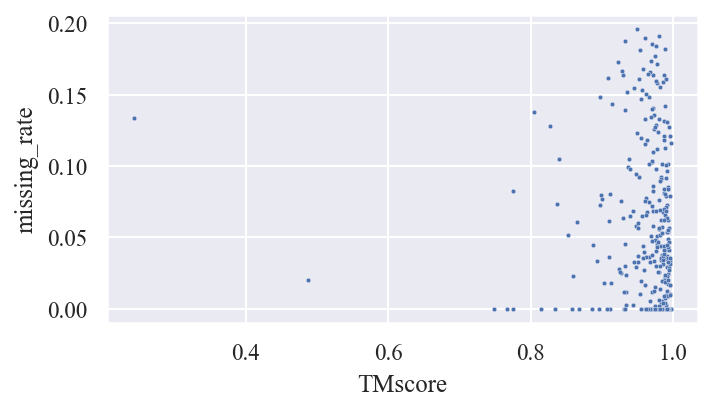

In [14]:
# Relationship between TMscore and ratio of missing residues
max_tmscore_df = df.groupby('Target').max('TMscore')
max_tmscore_df['missing_rate'] = max_tmscore_df['Num_missing'] / max_tmscore_df['Length']
sns.scatterplot(data=max_tmscore_df, x='TMscore', y='missing_rate', s=5)
plt.tight_layout()

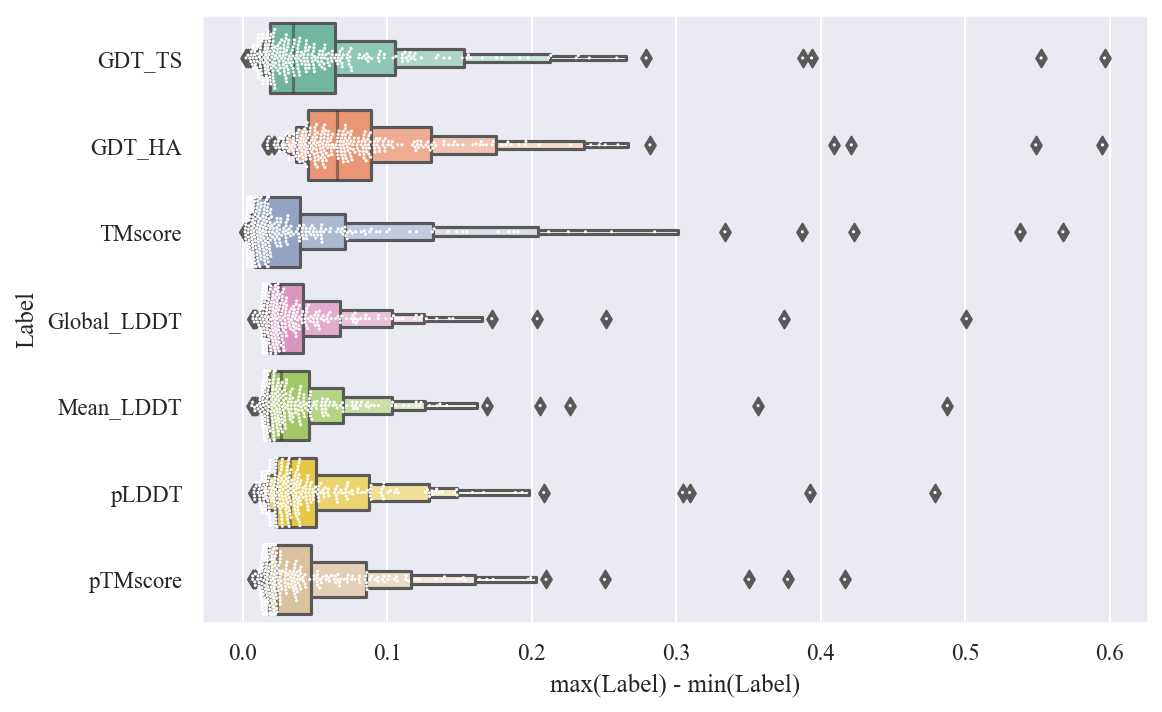

In [15]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

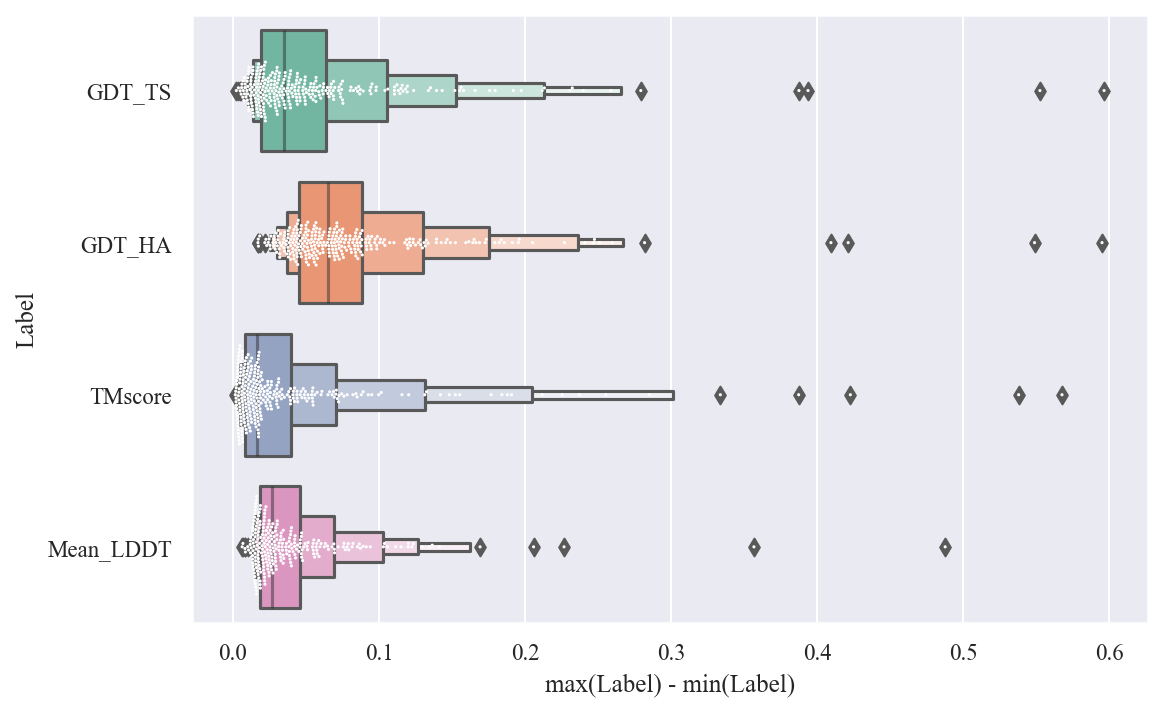

In [16]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

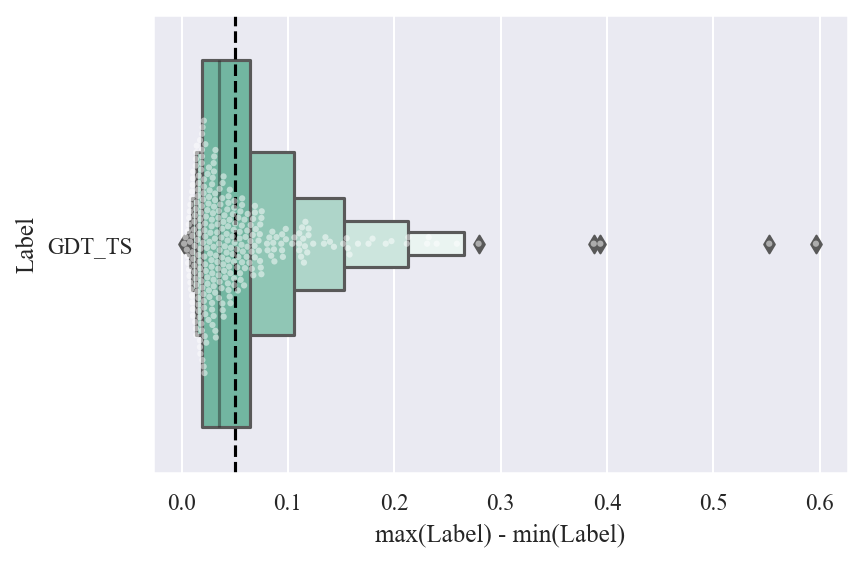

In [17]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS']
# labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(6, 4))
# plt.axvline(x=0.05, color='black', linestyle='--')
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=3, alpha=0.5)
plt.axvline(x=0.05, color='black', linestyle='--')
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

In [18]:
# Count target number whose value difference between max and min is larger than threshold
label = 'GDT_TS'
fil_df = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() >= 0.05)
print(fil_df['Target'].unique().size)
print(fil_df.groupby('Target').head(1)['is_similar_AF2'].value_counts())

101
False    61
True     40
Name: is_similar_AF2, dtype: int64


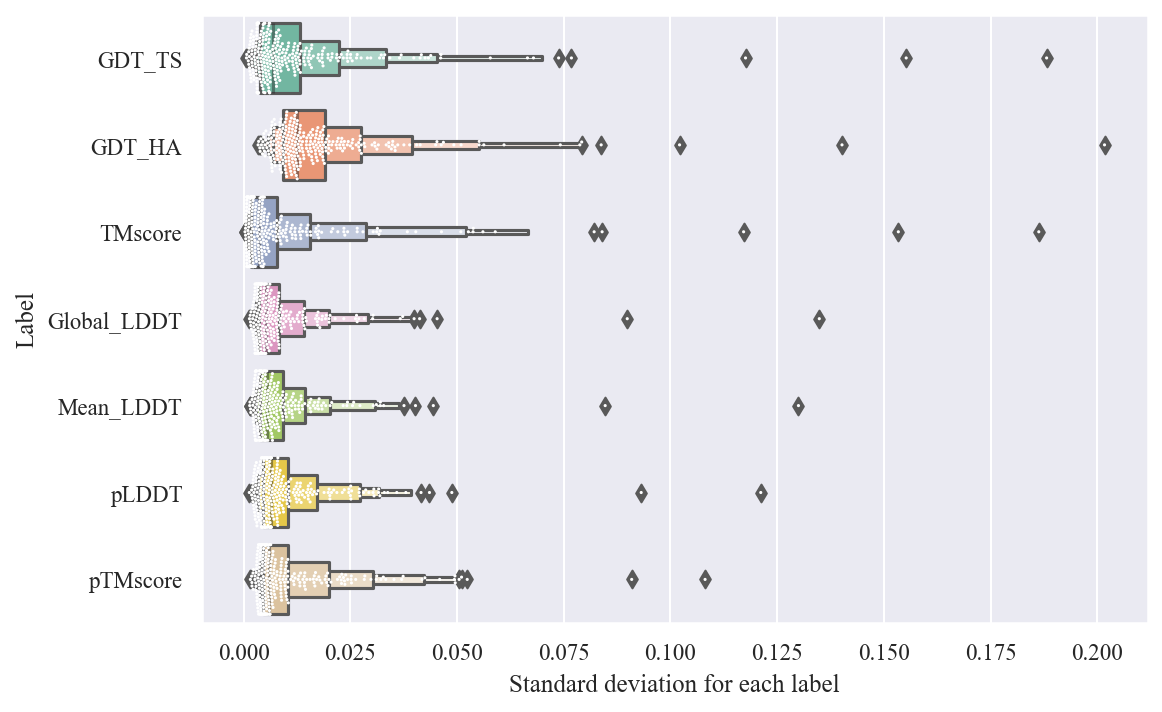

In [19]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
plt.savefig(fig_dir / 'std_each_labels.png')

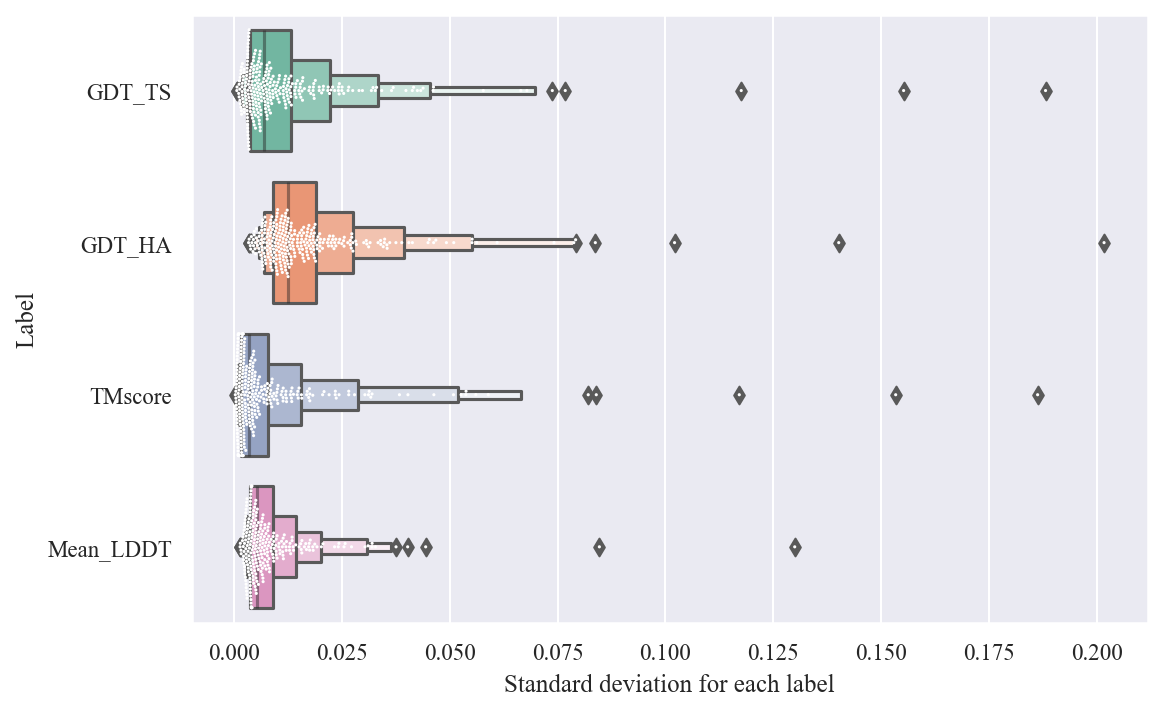

In [20]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
# plt.savefig(fig_dir / 'std_each_labels.png')

## Verify pLDDT and pTM

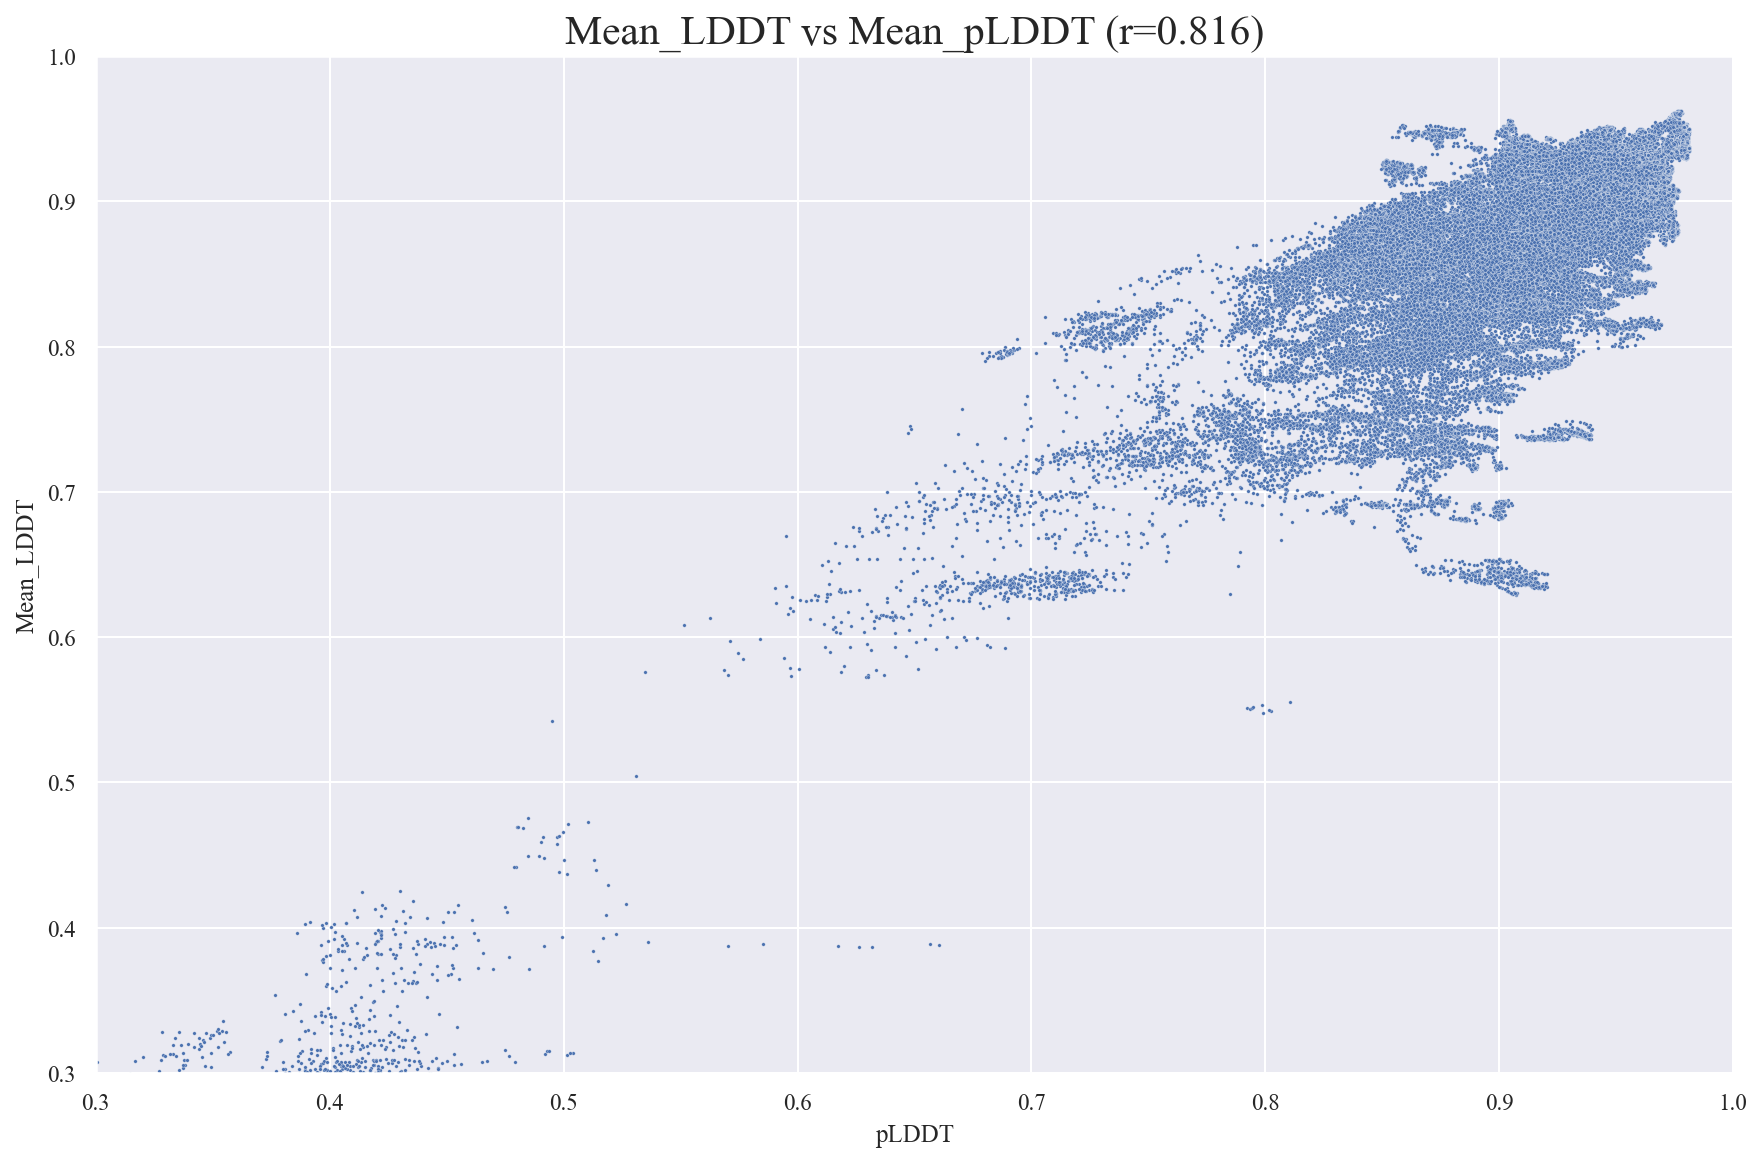

In [21]:
# Mean pLDDT vs Mean LDDT
label = 'Mean_LDDT'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.3, 1.0)
plt.ylim(0.3, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


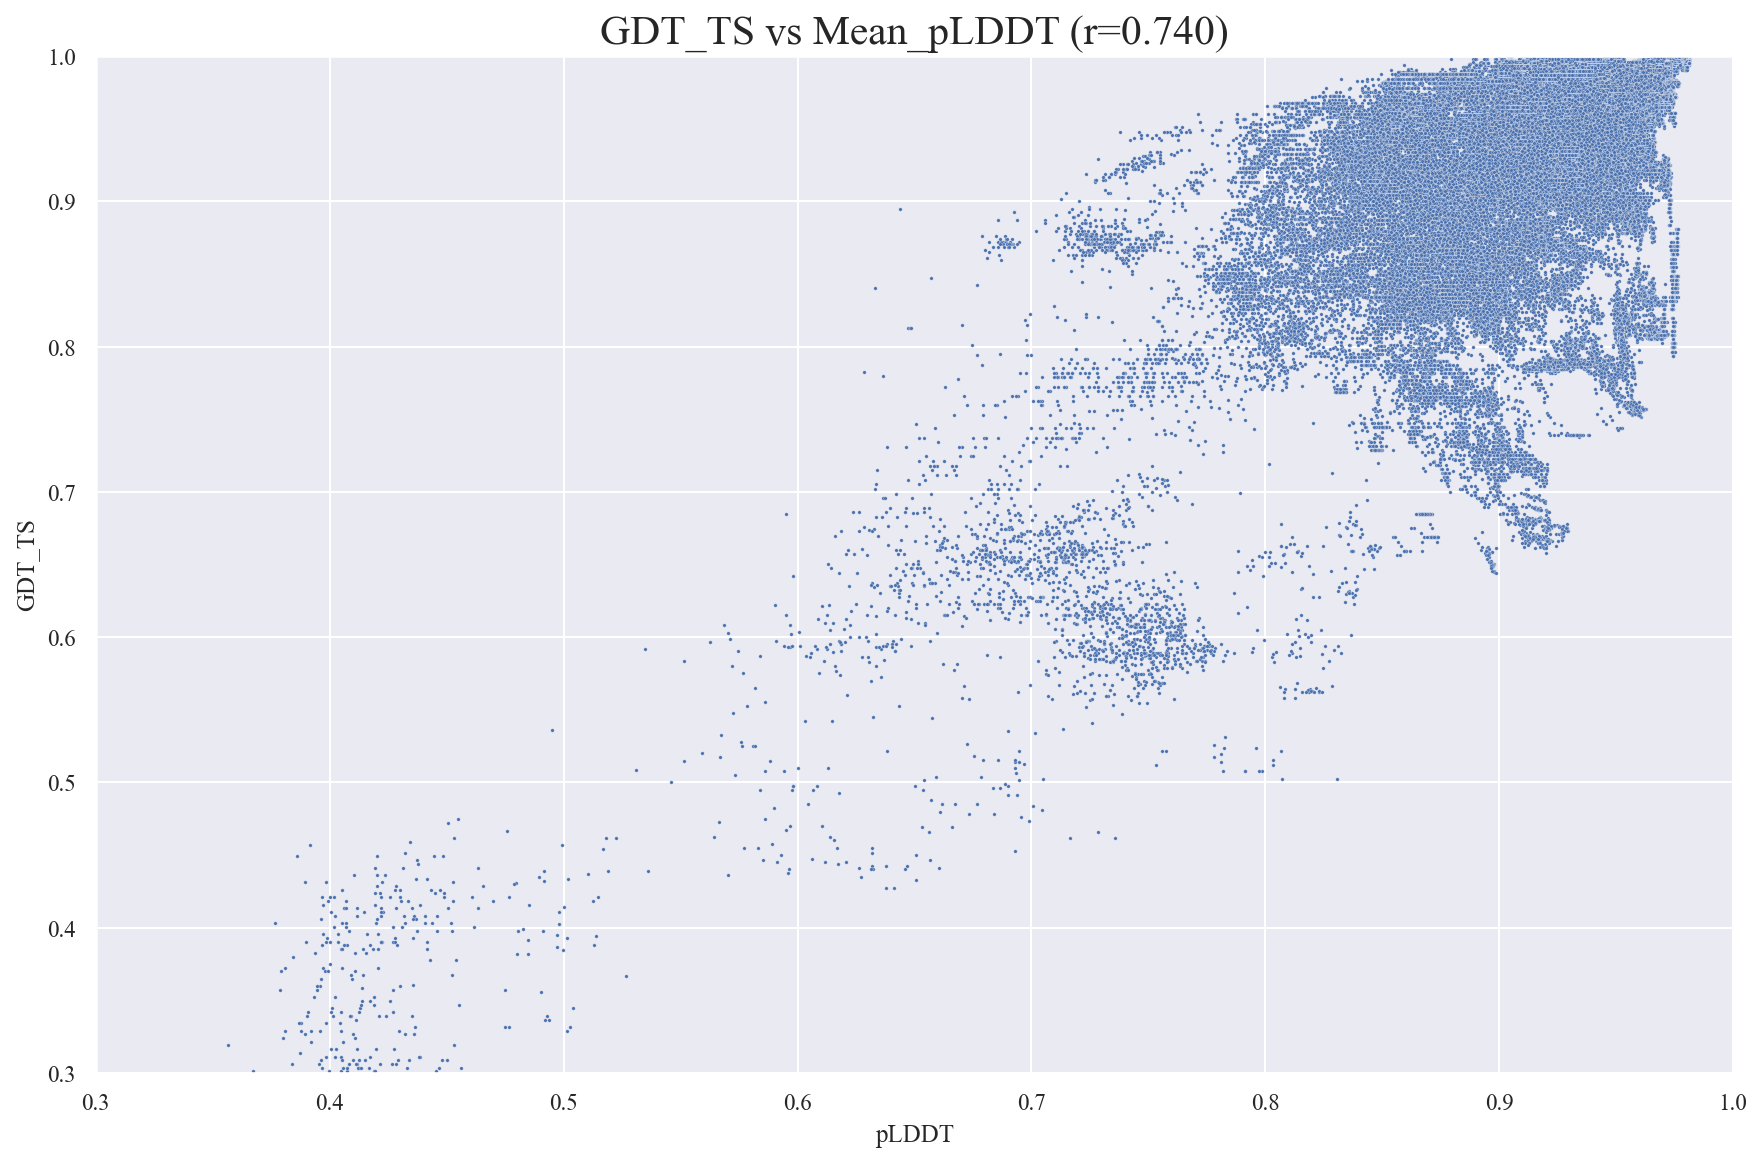

In [22]:
# Mean pLDDT vs GDT_TS
label = 'GDT_TS'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.3, 1.0)
plt.ylim(0.3, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


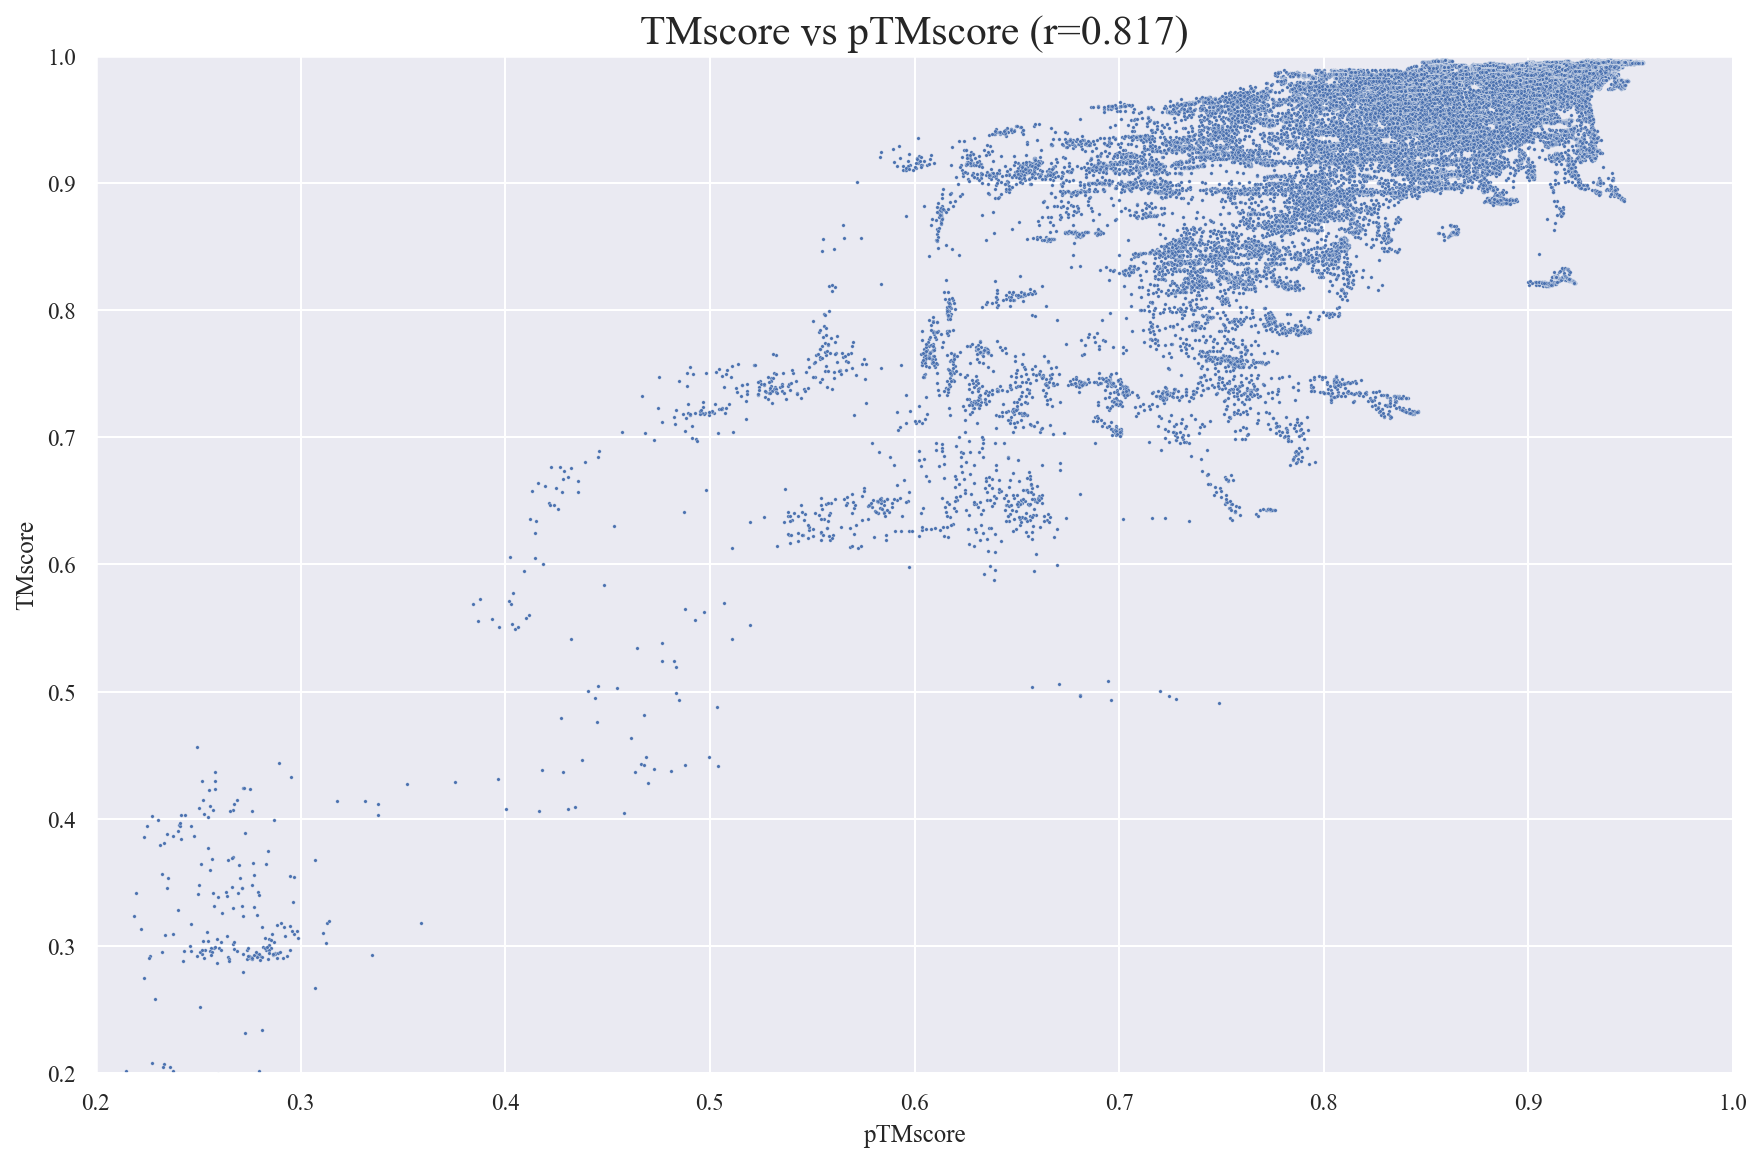

In [23]:
# pTMscore vs TMscore
label = 'TMscore'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.2, 1.0)
plt.ylim(0.2, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

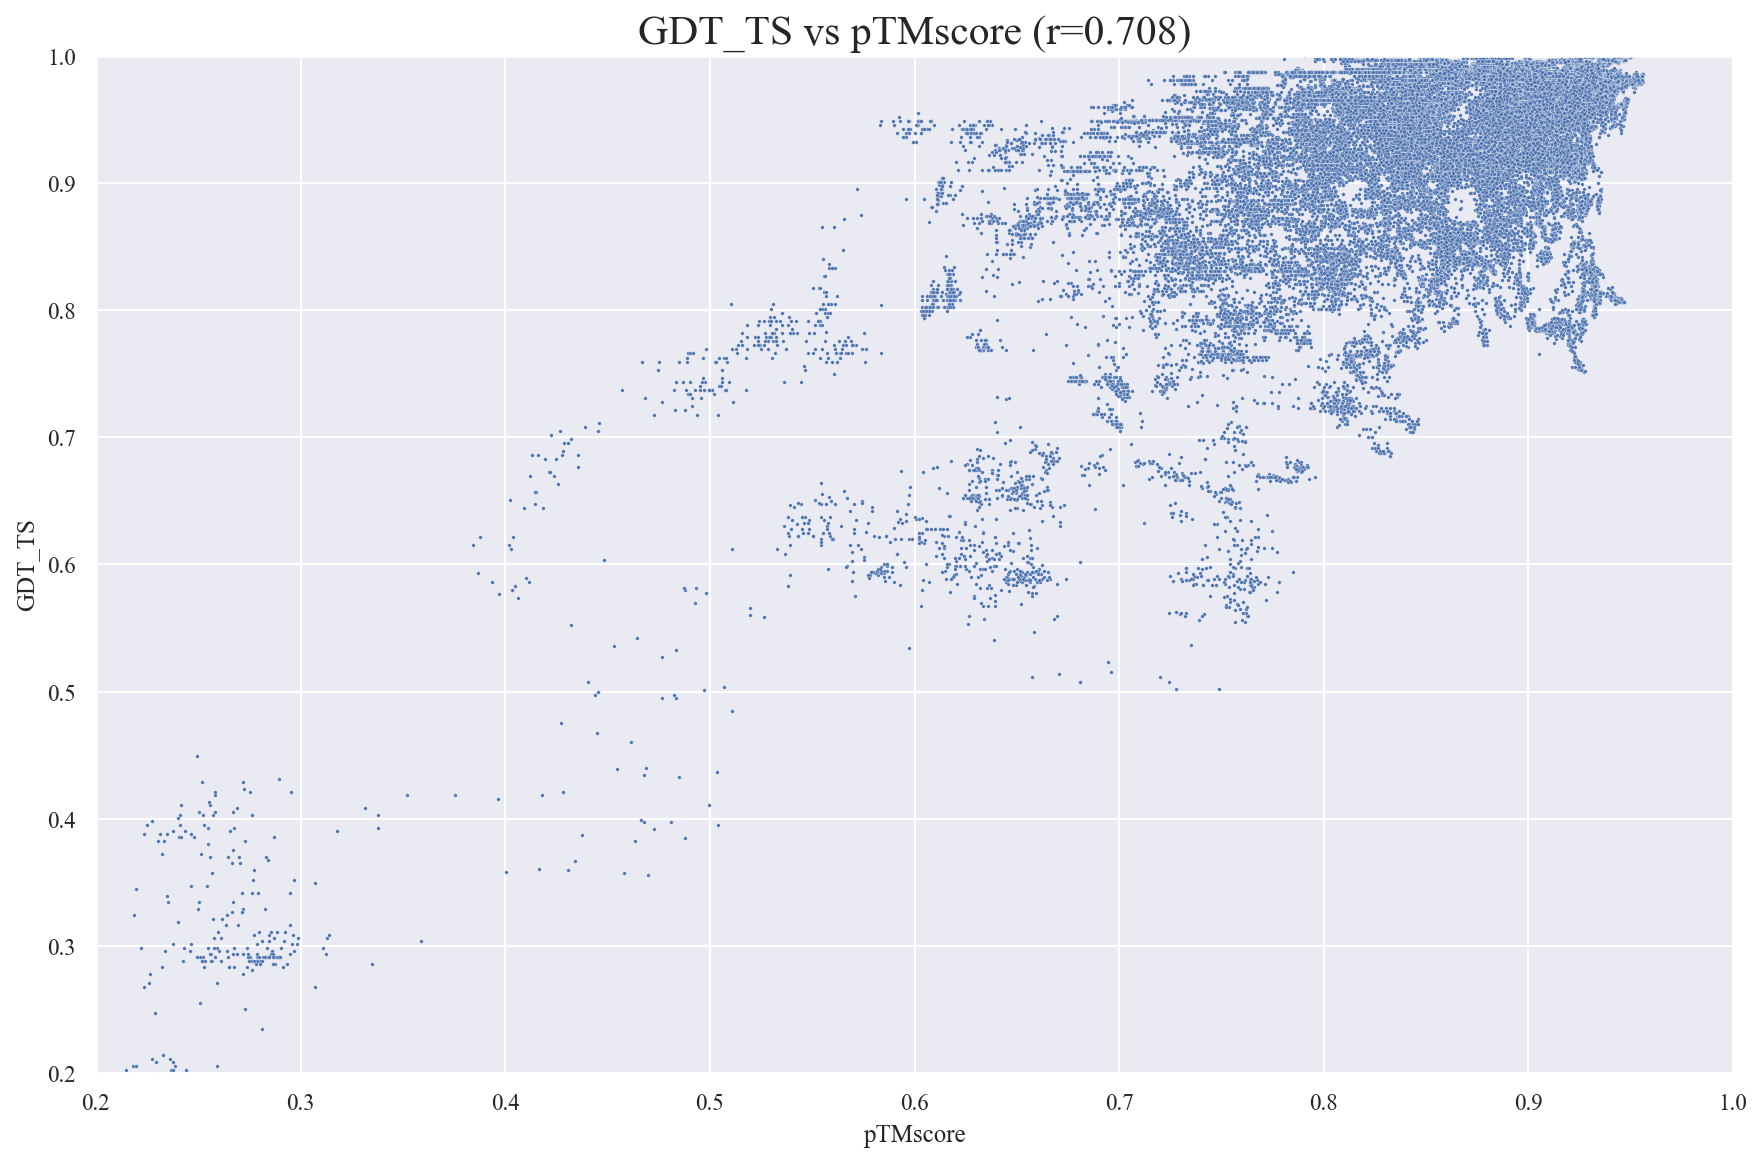

In [24]:
# pTMscore vs GDT_TS
label = 'GDT_TS'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.2, 1.0)
plt.ylim(0.2, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

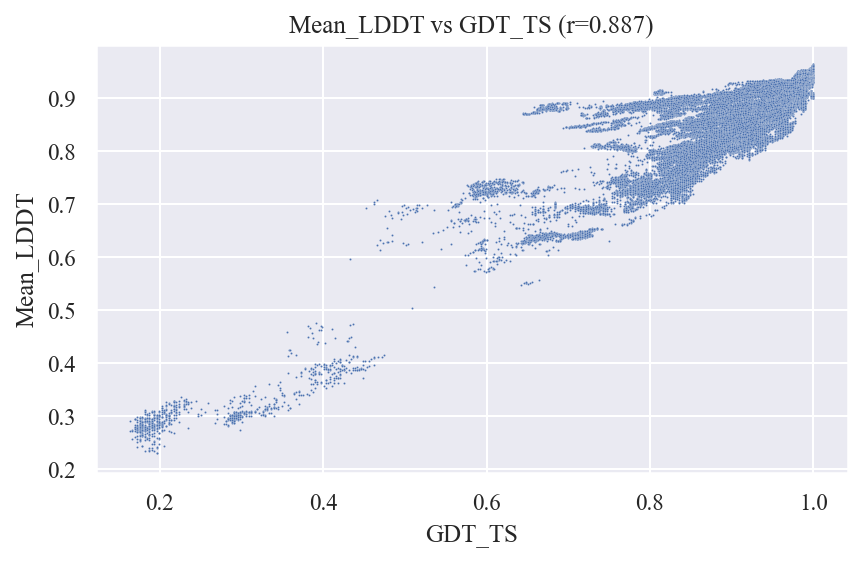

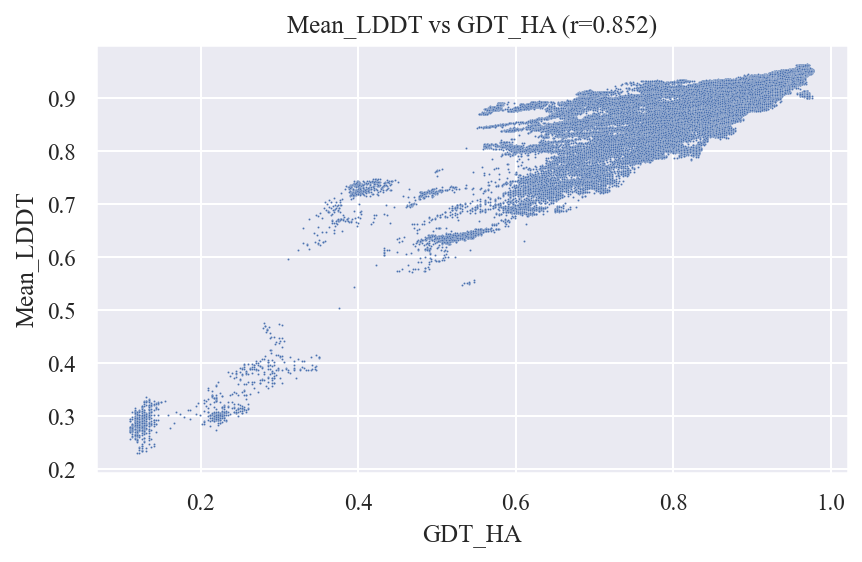

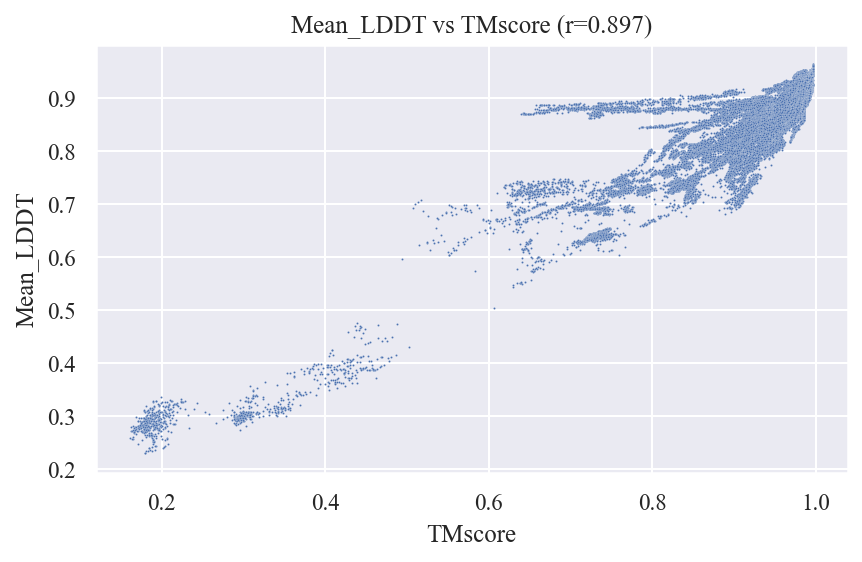

In [25]:
# Global score vs Mean local score
label = 'Mean_LDDT'
for label2 in ['GDT_TS', 'GDT_HA', 'TMscore']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=label2, y=label, s=1)
    cc = df.corr()[label][label2]
    plt.title(f'{label} vs {label2} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()

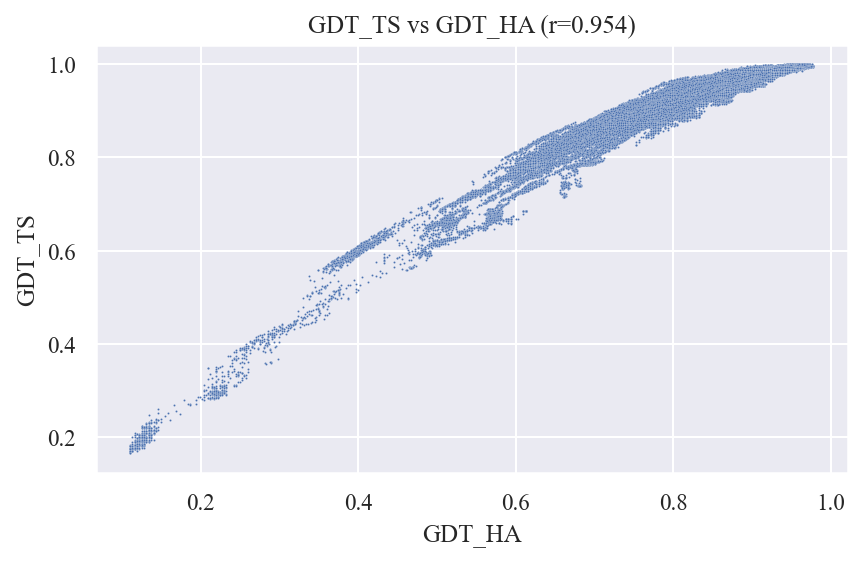

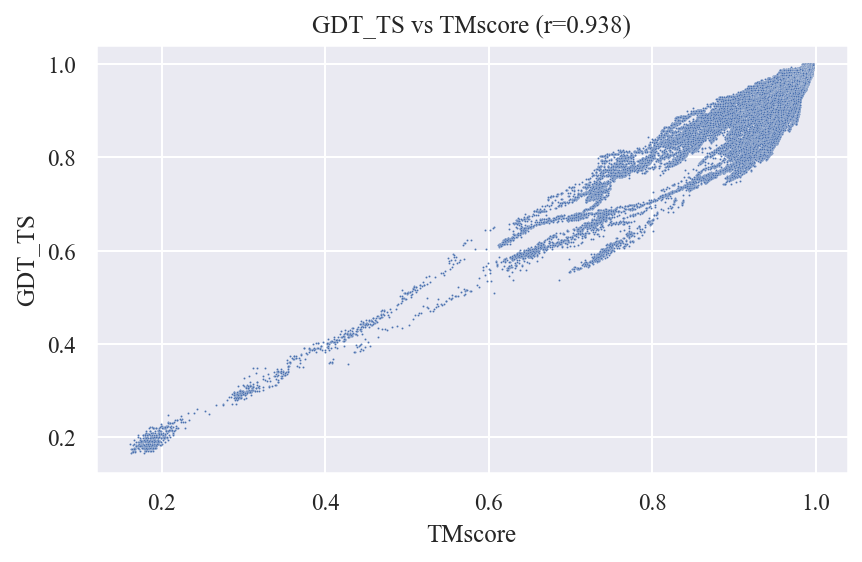

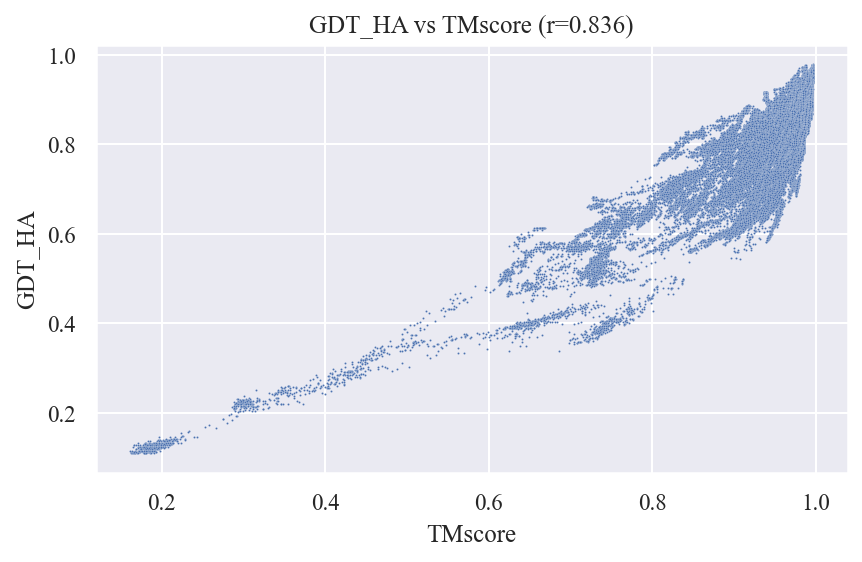

In [26]:
# Correlation between global labels
global_labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for i, label1 in enumerate(global_labels):
    for label2 in global_labels[i + 1:]:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=label2, y=label1, s=1)
        cc = df.corr()[label1][label2]
        plt.title(f'{label1} vs {label2} (r={cc:.3f})')
        plt.tight_layout()
    plt.show()